In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score,make_scorer, recall_score




In [2]:
filepath ="./customer_churn.csv"
df=pd.read_csv(filepath)

In [3]:
df.head()


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,900.0,41.816667,6.127560,22.0,38.0000,42.000,46.000,65.00
Total_Purchase,900.0,10062.824033,2408.644532,100.0,8497.1225,10045.870,11760.105,18026.01
Account_Manager,900.0,0.481111,0.499921,0.0,0.0000,0.000,1.000,1.00
Years,900.0,5.273156,1.274449,1.0,4.4500,5.215,6.110,9.15
Num_Sites,900.0,8.587778,1.764836,3.0,7.0000,8.000,10.000,14.00
Churn,900.0,0.166667,0.372885,0.0,0.0000,0.000,0.000,1.00


In [6]:
df.duplicated().sum()

0

In [7]:
df.Churn.value_counts()

Churn
0    750
1    150
Name: count, dtype: int64

In [27]:
df['Onboard_date'] = pd.to_datetime(df['Onboard_date'])

In [44]:
df1 = df.drop(columns=["Names","Location","Company",'Onboard_date'])


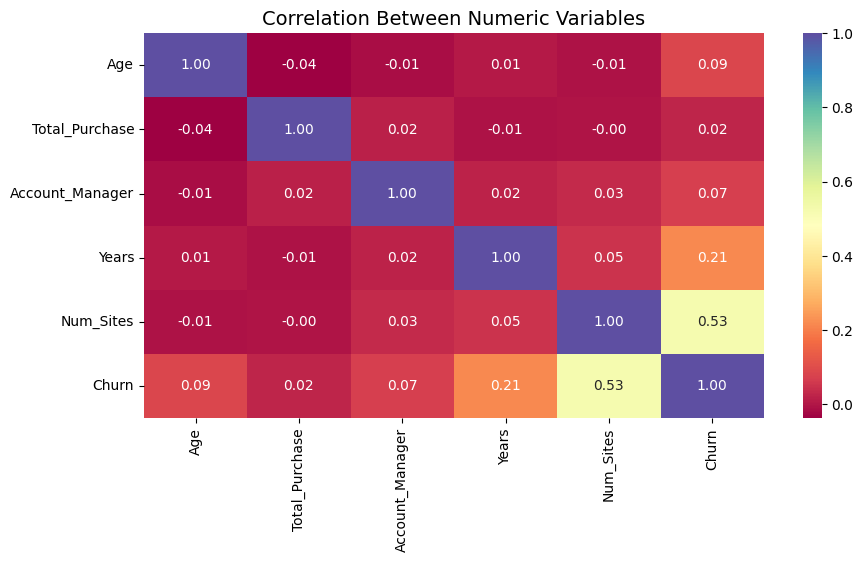

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,fmt=".2f", cmap="Spectral")
plt.title("Correlation Between Numeric Variables", fontsize=14)
plt.show()

In [30]:
df_categorical = df.copy()
df_categorical["Churn"] = list("Yes" if data == 1 else "No" for data in df_categorical["Churn"])
df_categorical["Churn"] = df_categorical["Churn"].astype("category")

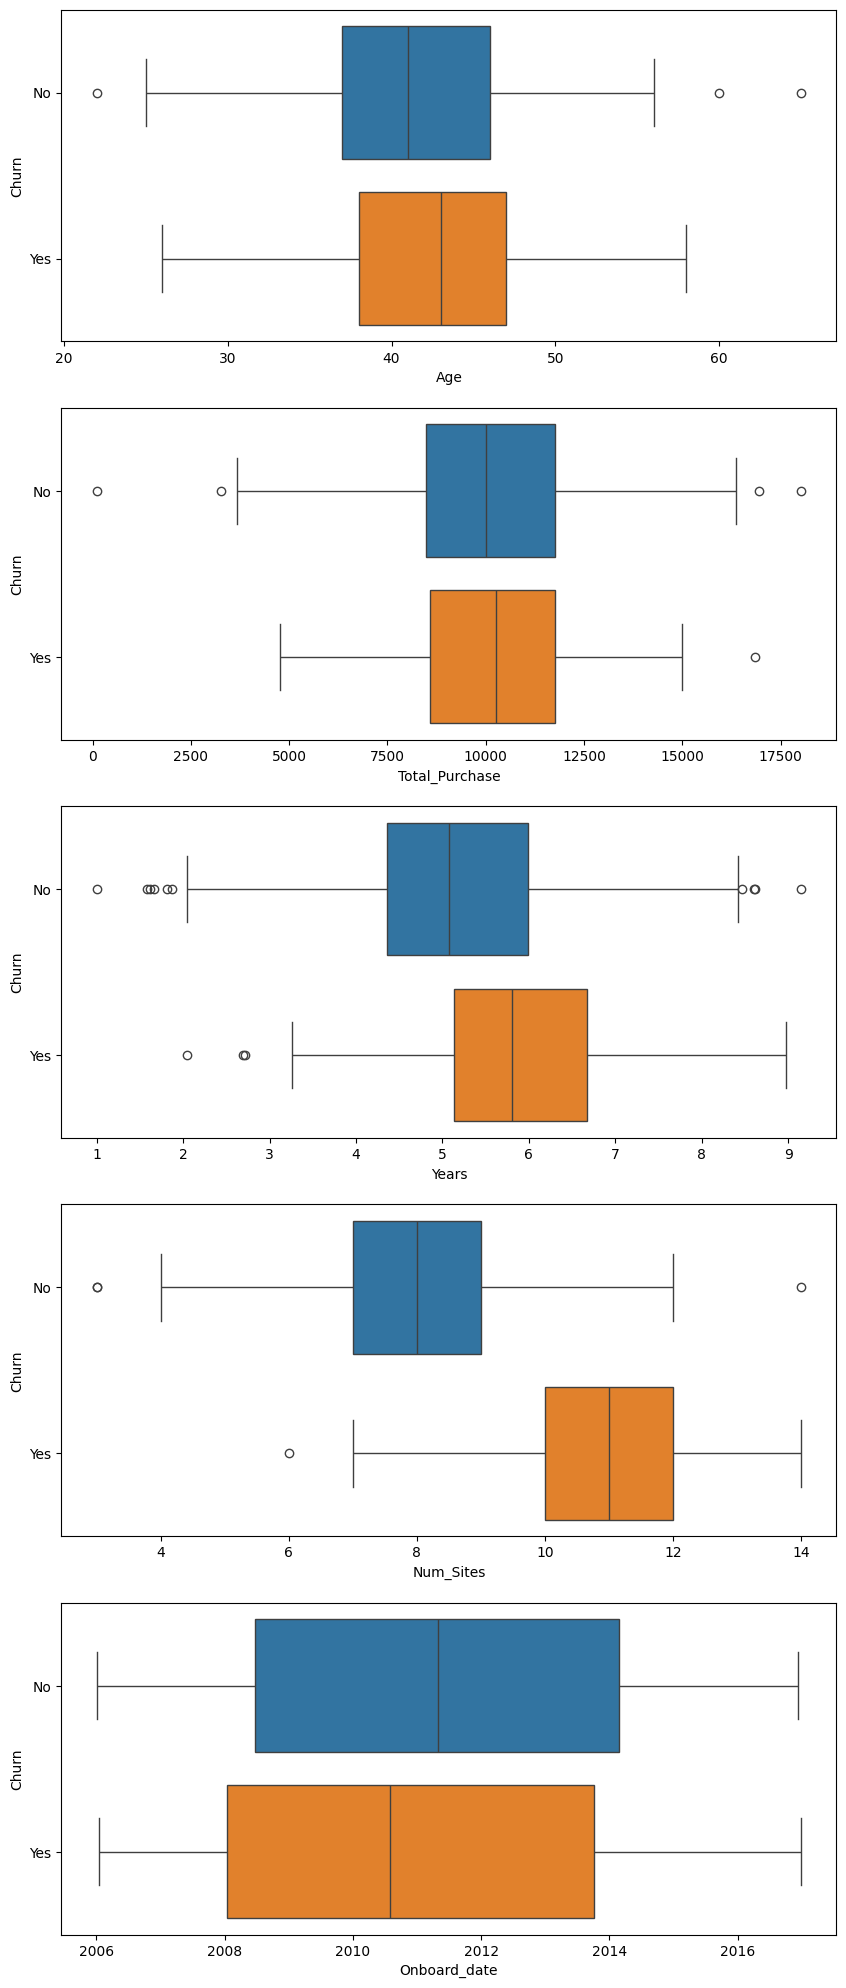

In [31]:
filtered_cols = ["Age","Total_Purchase","Years","Num_Sites","Onboard_date"]


fig, ax = plt.subplots(len(filtered_cols), 1, figsize=(10,25))

for i, var in enumerate(filtered_cols):
    sns.boxplot(data=df_categorical, y="Churn", x=var, hue="Churn", ax=ax[i])

Text(0.5, 1.0, 'number of customers churning with and without Account Manager')

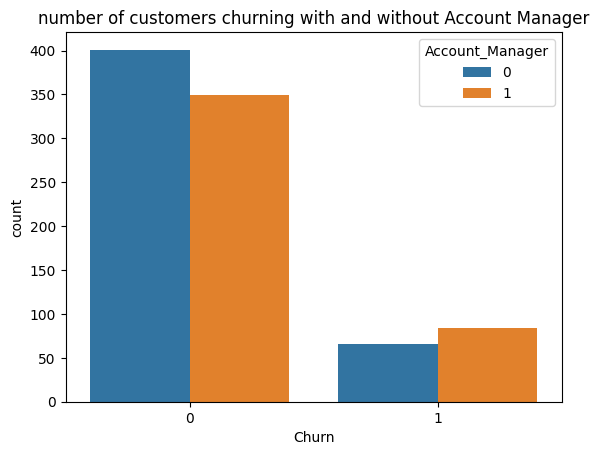

In [23]:
plan_hist = sns.countplot(data=df, x="Churn", hue="Account_Manager")
plan_hist.set_title("number of customers churning with and without Account Manager")

In [25]:
A_M_df = df[df["Account_Manager"] == 1]
no_A_M_df = df[df["Account_Manager"] == 0]

churn_rate_with_A_M = np.sum(A_M_df["Churn"]) / len(A_M_df["Churn"])
churn_rate_no_A_M = np.sum(no_A_M_df["Churn"]) / len(no_A_M_df["Churn"])

print(f"Churn Rate for cust. with acc manager  :   {round(churn_rate_with_A_M * 100, 2)}%")
print(f"Churn Rate for cust. without acc manager  :   {round(churn_rate_no_A_M * 100, 2)}%")

Churn Rate for cust. with acc manager  :   19.4%
Churn Rate for cust. without acc manager  :   14.13%


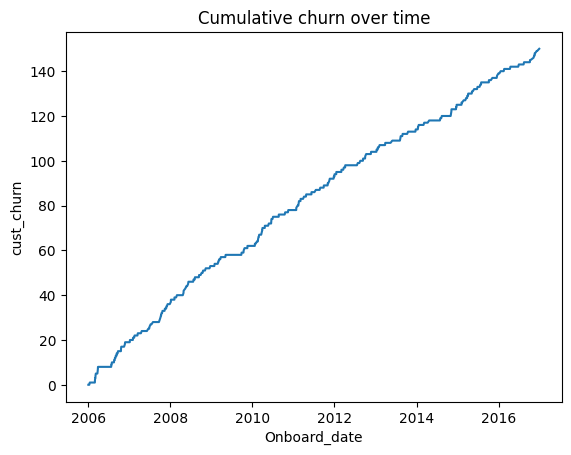

In [37]:
df_sorted = df.sort_values('Onboard_date')
df_sorted['cust_churn'] = df_sorted['Churn'].cumsum()
sns.lineplot(data=df_sorted, x='Onboard_date', y='cust_churn')
plt.title("Cumulative churn over time")
plt.show()

In [46]:
X = df1.drop(['Churn'], axis=1)
y = df['Churn']

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .22 , stratify=y, random_state = 42)


In [93]:
LRM = LogisticRegression(max_iter=1000, class_weight='balanced')
RFM = RandomForestClassifier(class_weight='balanced')
DTM = DecisionTreeClassifier()
SVCM = SVC()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
KNN =KNeighborsClassifier(5)

models = [LRM , RFM , DTM , SVCM , GBC , ABC,KNN]
results = {}
recall_scorer = make_scorer(recall_score, pos_label=1)

for model in models:
    print(f'The Model is {model}')
    k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X_train , y_train, cv=k_folds, scoring=recall_scorer)
    
    print("K-Fold Cross-Validation Recall Scores:", scores)
    
    mean_recall = np.mean(scores)
    results[model] = mean_recall
    print("Mean Recall:", mean_recall)
    print('-------------------------')


The Model is LogisticRegression(class_weight='balanced', max_iter=1000)
K-Fold Cross-Validation Recall Scores: [0.875     0.9047619 0.7       0.78125   0.85     ]
Mean Recall: 0.8222023809523809
-------------------------
The Model is RandomForestClassifier(class_weight='balanced')
K-Fold Cross-Validation Recall Scores: [0.375      0.76190476 0.35       0.34375    0.55      ]
Mean Recall: 0.47613095238095243
-------------------------
The Model is DecisionTreeClassifier()
K-Fold Cross-Validation Recall Scores: [0.5        0.80952381 0.4        0.34375    0.6       ]
Mean Recall: 0.5306547619047619
-------------------------
The Model is SVC()
K-Fold Cross-Validation Recall Scores: [0. 0. 0. 0. 0.]
Mean Recall: 0.0
-------------------------
The Model is GradientBoostingClassifier()
K-Fold Cross-Validation Recall Scores: [0.41666667 0.80952381 0.45       0.40625    0.55      ]
Mean Recall: 0.5264880952380953
-------------------------
The Model is AdaBoostClassifier()
K-Fold Cross-Validation

In [94]:
best_model = max(results, key=results.get)
print(f'The best model is {best_model} with a mean accuracy of {results[best_model]}')

best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)


The best model is LogisticRegression(class_weight='balanced', max_iter=1000) with a mean accuracy of 0.8222023809523809


In [95]:
best_model.score(X_train, y_train)

0.8205128205128205

In [96]:
best_model.score(X_test, y_test)

0.8787878787878788

In [97]:
accuracy_score(y_test, y_pred_best)

0.8787878787878788

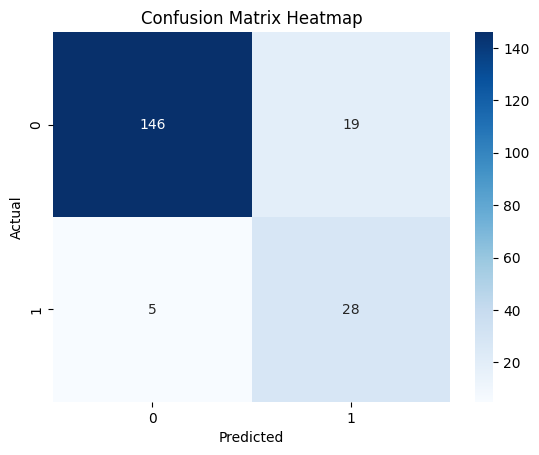

In [99]:
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [100]:

precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.5957446808510638
Recall: 0.8484848484848485
F1 Score: 0.7


In [101]:
print("Accuracy:", accuracy_score(y_test, y_pred_best))

Accuracy: 0.8787878787878788


In [102]:
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred_best

# False Negatives
false_negatives = results[(results['Actual'] == 1) & (results['Predicted'] == 0)]

# False Positives
false_positives = results[(results['Actual'] == 0) & (results['Predicted'] == 1)]


In [103]:
false_negatives.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Actual,Predicted
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0
mean,42.400000,10461.346000,0.600000,4.828000,8.800000,1.0,0.0
std,7.092249,3188.019138,0.547723,1.587552,1.095445,0.0,0.0
min,36.000000,6330.430000,0.000000,2.050000,7.000000,1.0,0.0
25%,37.000000,9191.580000,0.000000,5.090000,9.000000,1.0,0.0
50%,40.000000,9403.580000,1.000000,5.430000,9.000000,1.0,0.0
75%,46.000000,13655.590000,1.000000,5.560000,9.000000,1.0,0.0
max,53.000000,13725.550000,1.000000,6.010000,10.000000,1.0,0.0


In [104]:
false_negatives.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Actual,Predicted
80,53.0,13655.59,1,2.05,10.0,1,0
111,36.0,6330.43,1,5.43,7.0,1,0
4,37.0,9191.58,0,5.56,9.0,1,0
84,46.0,13725.55,0,5.09,9.0,1,0
78,40.0,9403.58,1,6.01,9.0,1,0


In [105]:
false_positives.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Actual,Predicted
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.0
mean,43.157895,10255.228421,0.526316,6.308947,10.000000,0.0,1.0
std,5.785645,1561.512471,0.512989,1.684771,0.816497,0.0,0.0
min,32.000000,6535.910000,0.000000,2.600000,8.000000,0.0,1.0
25%,39.500000,9118.480000,0.000000,4.845000,10.000000,0.0,1.0
50%,43.000000,10469.500000,1.000000,6.540000,10.000000,0.0,1.0
75%,45.500000,11454.325000,1.000000,7.630000,10.500000,0.0,1.0
max,55.000000,12919.920000,1.000000,8.620000,11.000000,0.0,1.0


In [106]:
false_positives.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Actual,Predicted
284,42.0,10527.52,1,8.42,8.0,0,1
465,43.0,9200.69,1,2.60,11.0,0,1
563,44.0,8748.36,1,6.32,10.0,0,1
164,39.0,8930.49,1,5.71,10.0,0,1
785,37.0,11517.19,1,8.34,11.0,0,1


In [107]:
true_positives = results[(results['Actual'] == 1) & (results['Predicted'] == 1)]
true_negatives = results[(results['Actual'] == 0) & (results['Predicted'] == 0)]

In [108]:
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = best_model.predict(X_test)

# Step 2: Define the prediction outcome
def get_outcome(row):
    if row['Actual'] == 1 and row['Predicted'] == 1:
        return 'TP'
    elif row['Actual'] == 0 and row['Predicted'] == 0:
        return 'TN'
    elif row['Actual'] == 1 and row['Predicted'] == 0:
        return 'FN'
    else:
        return 'FP'

# Step 3: Apply it to create a new column
results['PredictionType'] = results.apply(get_outcome, axis=1)

In [112]:
importances = best_model.feature_importances_

# Create DataFrame with feature names and importance values
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
print(feat_imp_df.head(10))

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

/var/folders/sx/ch1z2wcs05l7n6_3cb6xkh680000gn/T/ipykernel_24371/1340089855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')


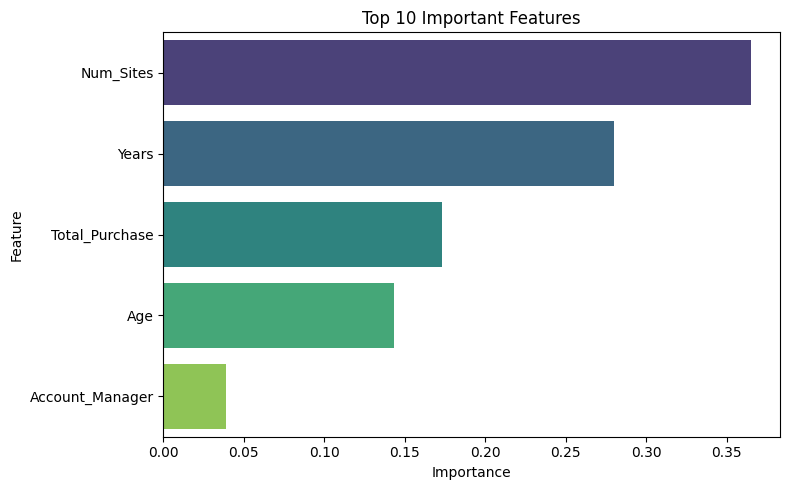

In [113]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()


In [110]:
top_features = feat_imp_df['Feature'].head(4).tolist()  # adjust number if needed
top_features.append('PredictionType')  # Add the prediction category column
pairplot_data = results[top_features]

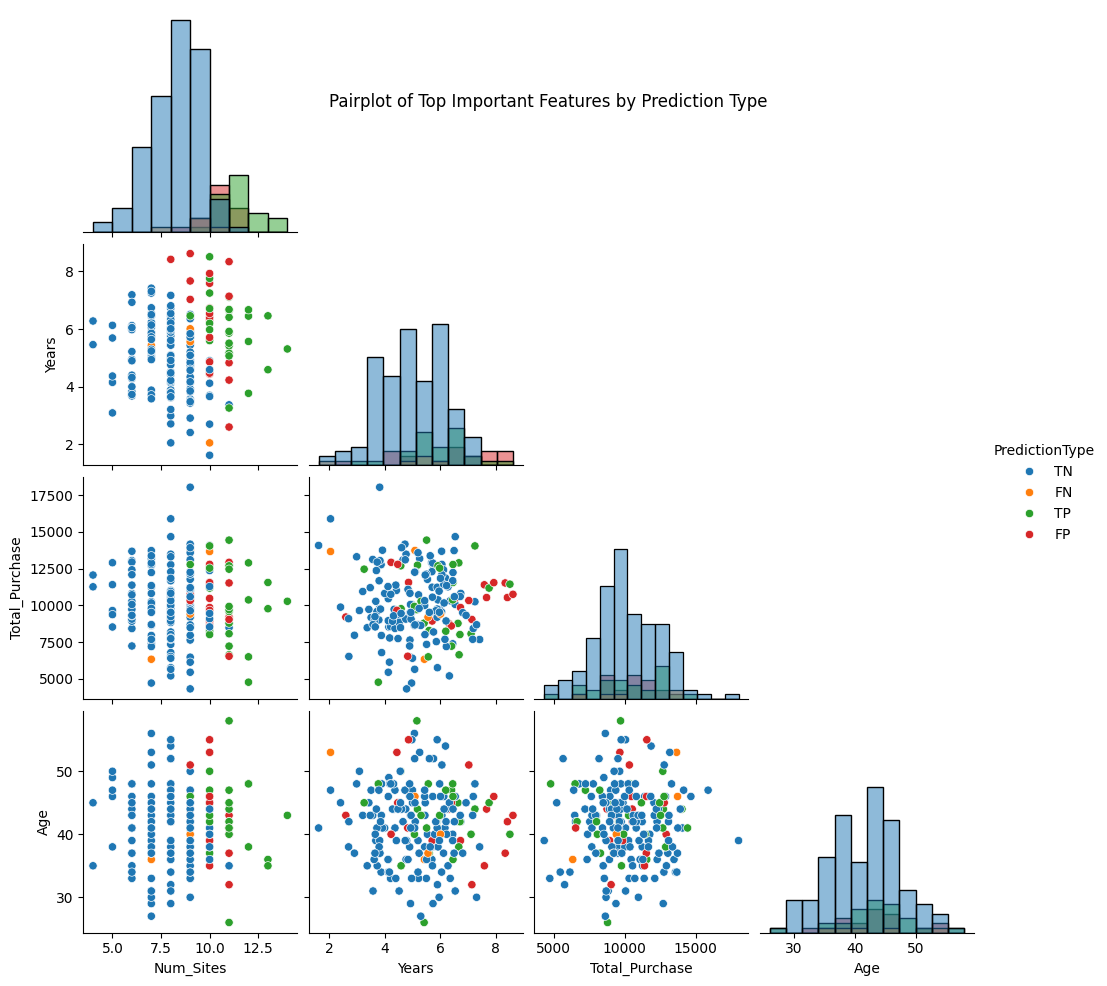

In [111]:
sns.pairplot(data=pairplot_data, hue='PredictionType', diag_kind='hist', corner=True)
plt.suptitle("Pairplot of Top Important Features by Prediction Type", y=0.9)
plt.show()


<Axes: xlabel='Num_Sites', ylabel='Count'>

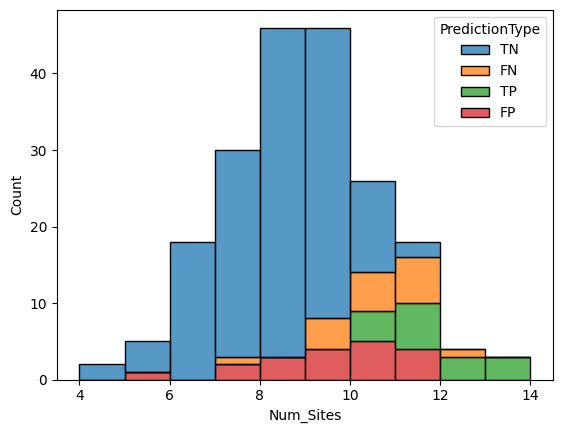

In [76]:
sns.histplot(data=results, x='Num_Sites', hue='PredictionType', multiple='stack')


<Axes: xlabel='Years', ylabel='Count'>

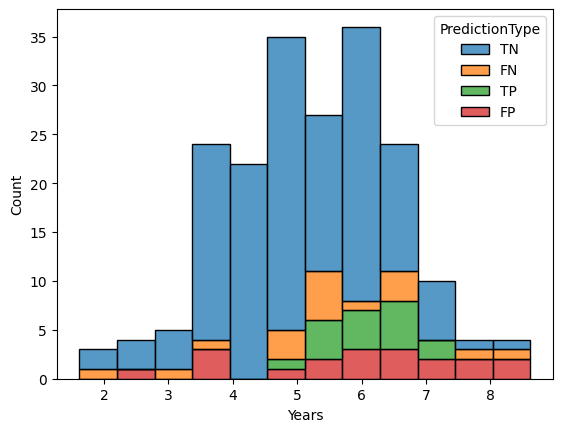

In [77]:
sns.histplot(data=results, x='Years', hue='PredictionType', multiple='stack')

<Axes: xlabel='Total_Purchase', ylabel='Count'>

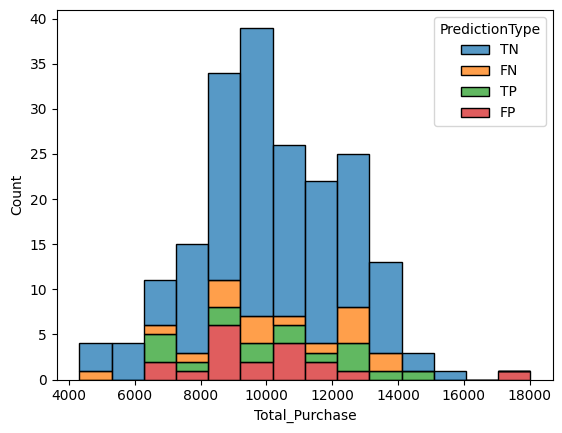

In [78]:
sns.histplot(data=results, x='Total_Purchase', hue='PredictionType', multiple='stack')

<Axes: xlabel='Age', ylabel='Count'>

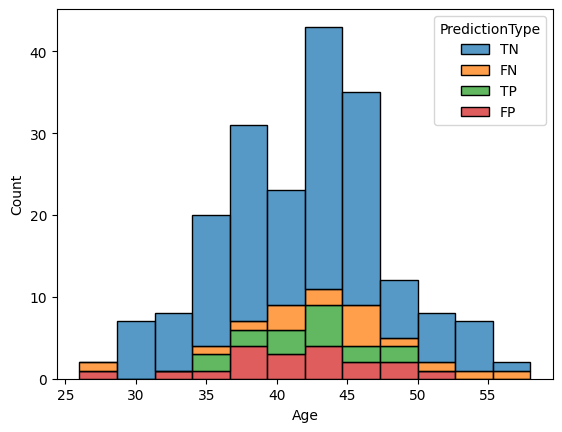

In [79]:
sns.histplot(data=results, x='Age', hue='PredictionType', multiple='stack')

In [114]:
y_proba = best_model.predict_proba(X_test)[:, 1]

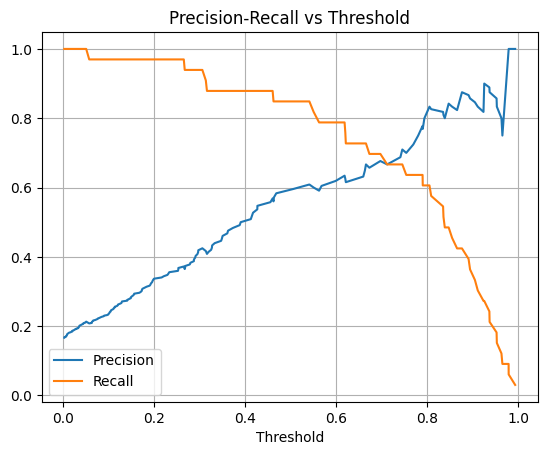

In [115]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()

In [123]:
thresholds = np.arange(0.0, 1.0, 0.01)
selected_thresh = None

for thresh in thresholds:
    y_pred_thresh = (y_proba > thresh).astype(int)
    rec = recall_score(y_test, y_pred_thresh)
    if rec >= 0.8:
        selected_thresh = thresh
        break  # first threshold where recall hits 0.8
       
print(f"Threshold to achieve recall ≥ 0.7: {selected_thresh}")

Threshold to achieve recall ≥ 0.7: 0.0


In [129]:

y_pred_new = (y_proba >0.7).astype(int)  # Lower threshold to catch more churners

In [130]:
from sklearn.metrics import recall_score

y_pred_all_churn = np.ones_like(y_test)  # pretend everyone churns
max_possible_recall = recall_score(y_test, y_pred_all_churn)
print("Maximum recall if predicting all churn:", max_possible_recall)

Maximum recall if predicting all churn: 1.0


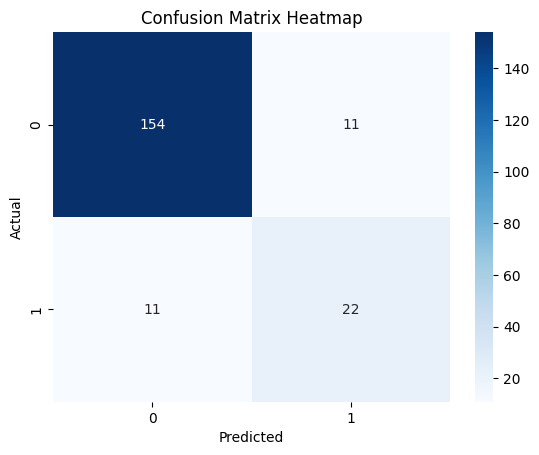

In [131]:
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [132]:

precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
f1 = f1_score(y_test, y_pred_new)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666


In [133]:
print("Accuracy:", accuracy_score(y_test, y_pred_new))

Accuracy: 0.8888888888888888


In [134]:

results = {
    "y_pred_new (threshold=0.38)": accuracy_score(y_test, y_pred_new),
    "y_pred_best (original)": accuracy_score(y_test, y_pred_best)
}


best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print(f"The best accuracy is {best_accuracy:.4f} from: {best_model_name}")


The best accuracy is 0.8889 from: y_pred_new (threshold=0.38)


In [100]:
import joblib

In [101]:
joblib.dump(best_model, 'model_churn.pkl')

['model_churn.pkl']